# Toy Data Science Project: 
# Can you trust a website's Ratings of Movies When The Website Also Sells Movie Tickets?

### This Project Explores the 538 article results refereneced <a href='http://fivethirtyeight.com/features/fandango-movies-ratings/'>here</a>.

### All data is taken from 538's github: <a href='https://github.com/fivethirtyeight/data'>github.com/fivethirtyeight/data</a>


#### There are multiple goals for this small project:
1) Showcase, strengthen my usage of the libraries: Numpy, Pandas, Matplotlib, and Seaborn.
2) We wish to recreate some of the results from the 538 article.
3) Explore some other insights from the data.

* This Project was from a Udemy course I have been following in an effort to strengthen my knowledge of existing libraries related to machine learning and their inner workings. I thank the instructor for this interesting project.

#### A short overview for those who don't wish to read the 538 article:
Fandango, a webiste that both **sells** movie tickets and shows **ratings** of movies has suspiciously rated bad movies such as "Taken 3" with a high star rating on their webiste. The 538 article investigates these claims. We will recreate and further explore these claims using the data they have provided on their github.

**Author Note** This does not reflect my personal opinion on "Taken 3". The statement holds true reflected from independent sources such as Rotten Tomatoes and IMDB as we see later in this analysis.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic, IMDB, and Rotten Tomatoes. Let's read in these CSVs and take a look at the data available. We'll start with the Fandango website.

In [23]:
fandango = pd.read_csv("fandango_scrape.csv")

In [25]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [27]:
fandango.sample(5)

,FILM,STARS,RATING,VOTES
464,La passion d'Augustine (2015),0.0,0.0,0
124,The Vatican Tapes (2015),3.0,2.9,210
232,Jil (2015),3.5,3.2,22
327,Backcountry (2015),4.0,3.8,6
406,Dark Star: H.R. Giger's World (2015),3.0,3.0,1


In [32]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


Pretty Straightforward. There are **504** movies in the dataset. Here's a closer look at the definitions of each of these columns

Column | Definiton
--- | ---------
FILM | The movie name
STARS | Number of stars presented on the Fandango website (Fandango.com)
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time 538 pulled it.

Below we chose a dpi=150 with a larger figure size than the default in order to modify the final output from seaborn, the result is a more enhanced plot.

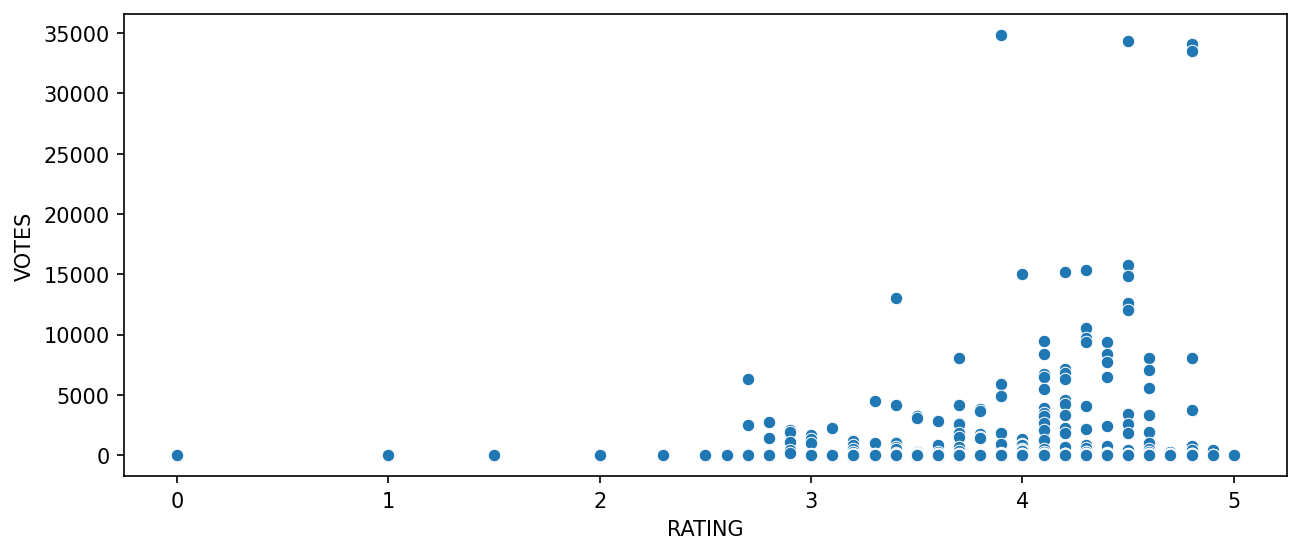

In [37]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,x='RATING',y='VOTES');

The above plot takes each of the 504 movies, and places each one on the graph. We can see that movies with higher ratings tend to have more votes, which is probably expected. So far so good. Let's take a look at the Pearson correlation in the numerical datasets. If the line fits, the correlation is 1.0.

In [42]:
fandango[['STARS', 'RATING', 'VOTES']].corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Indeed there is little correlation between the number of VOTES and any of the ratings. While the correlation is quite high between RATING and STARS, we would expect it to be 1.0. 

Let's add a numerical column of 'YEAR' in the dataset to help us gain deeper insights into which movies exist in the dataset.

In [54]:
fandango['YEAR'] = fandango['FILM'].map(lambda title: title.split()[-1][1:-1])
fandango['YEAR'] = pd.to_numeric(fandango['YEAR'])
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
 4   YEAR    504 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 19.8+ KB


In [57]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

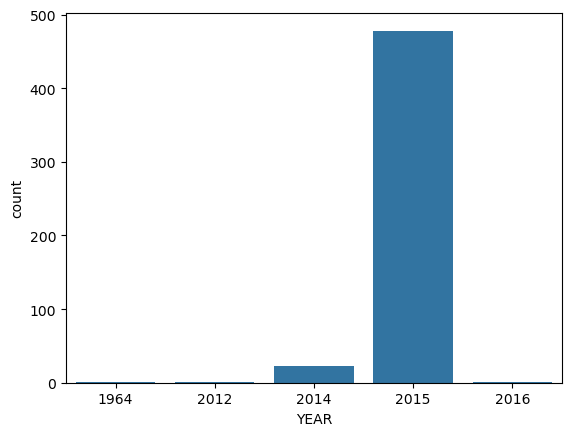

In [59]:
sns.countplot(data=fandango,x='YEAR')

The movies which recieved the highest amount of voters were:

In [61]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


The number of movies with no voters at all were:

In [65]:
no_votes = fandango['VOTES']==0 
no_votes.sum()

69

Since these movies can harm our analysis, let us only take a look at movies with some number of reviews.

In [67]:
fandango = fandango[fandango['VOTES'] > 0]
fandango.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   YEAR    435 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 20.4+ KB


The number of movies now should be:

In [71]:
504-69

435

As expected.
Next, we take a look at the difference between the true rating of users vs. the stars displayed on the Fandango website. We call kdeplot with fill=True in order to prettify the end result only.

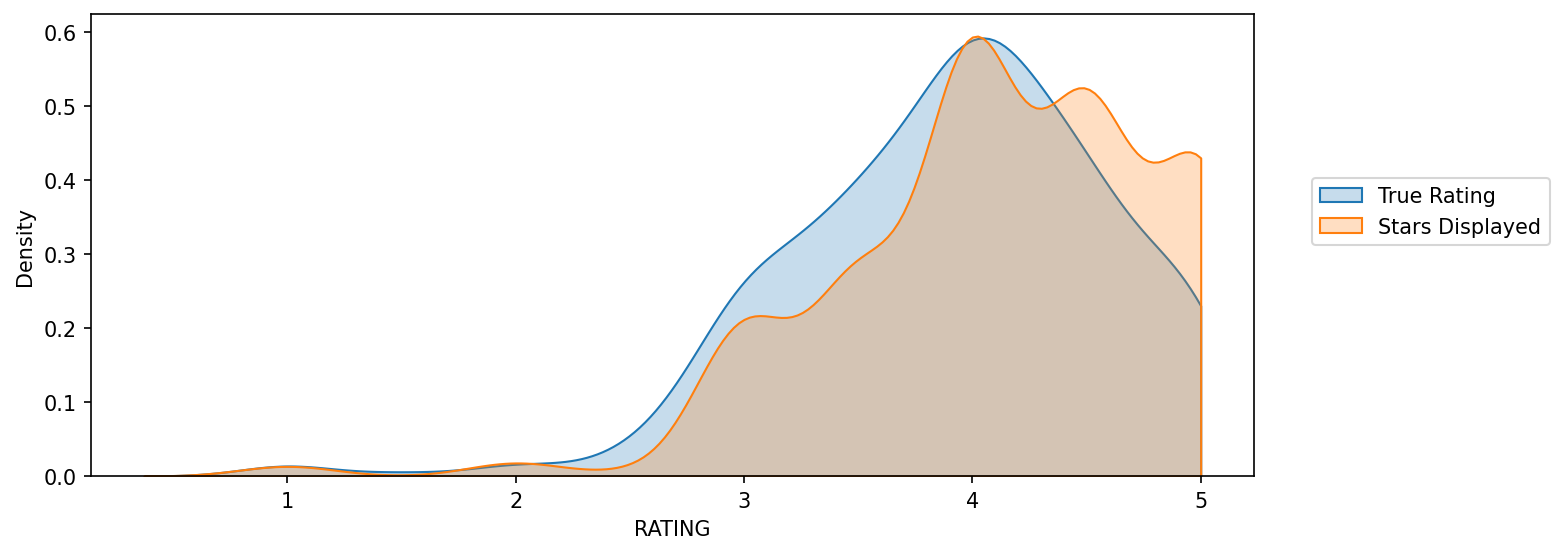

In [78]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fandango,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fandango,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

Let's now actually quantify this discrepancy. We create a new column of the different between STARS displayed versus true RATING. Round that to the second decimal.

In [82]:
fandango["STARS_DIFF"] = fandango['STARS'] - fandango['RATING'] 
fandango['STARS_DIFF'] = fandango['STARS_DIFF'].round(2)

C:\Users\eli_a\AppData\Local\Temp\ipykernel_45332\3232209290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango["STARS_DIFF"] = fandango['STARS'] - fandango['RATING']
C:\Users\eli_a\AppData\Local\Temp\ipykernel_45332\3232209290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango['STARS_DIFF'] = fandango['STARS_DIFF'].round(2)


In [84]:
# sanity check:
fandango.sample(5)

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
235,Cop Car (2015),3.5,3.4,22,2015,0.1
255,Heaven Knows What (2015),4.0,3.5,17,2015,0.5
108,The Last: Naruto the Movie (2015),5.0,4.8,409,2015,0.2
394,Dogs on the Inside (2015),5.0,5.0,2,2015,0.0
116,Star Wars: Episode VII - The Force Awakens (2015),5.0,4.7,261,2015,0.3


C:\Users\eli_a\AppData\Local\Temp\ipykernel_45332\1802121837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fandango,x='STARS_DIFF',palette='magma')


<Axes: xlabel='STARS_DIFF', ylabel='count'>

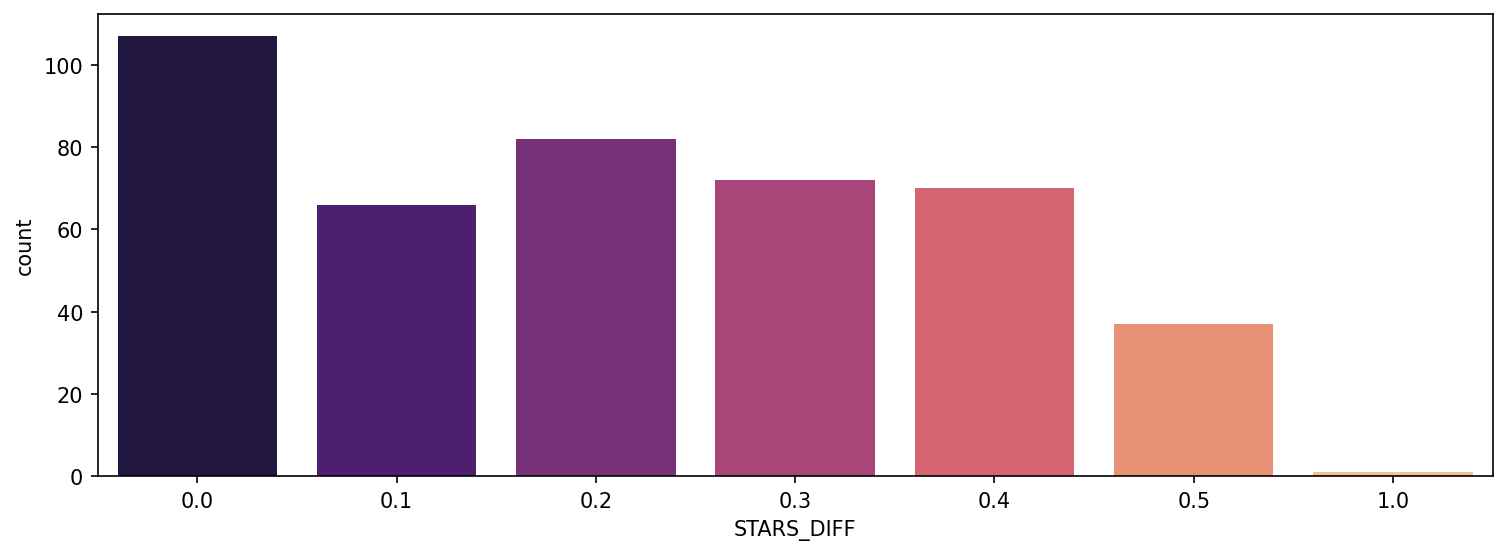

In [86]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fandango,x='STARS_DIFF',palette='magma')

The above plot shows us that many of the movies have some disparity between the true rating and the stars displayed. Perhaps having up to 0.25 or even 0.4 may be acceptable in some cases, but about 40 movies have 0.5 difference and one movie in particular has a 1.0 difference! Clearly Fandango is doing something shady.
Well, let's check which movie has that 1.0 difference?

In [90]:
fandango[fandango['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


Next, let's compare Fandango to other sites. For this we will load another dataset with **146** movies containing movies scraped from other websites. The columns explain themselves.

In [95]:
all_sites = pd.read_csv("all_sites_scores.csv")
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [98]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [100]:
all_sites.describe().T

,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


We want to compare how Fandango does to other sites. Let us perform an inner merge between both dataframes. This ensures that only data which exists in both DFs exists in this new one. Better take a look at this new Dataframe.

In [107]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [111]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252


One important thing to notice here is that there is a difference between how Fandango is scoring movies and how other websites assigns scores. To this end, we normalize other sites to match Fandango's in order to have a fair comparison. First, let's take a look at the description to get a birdeye's view of this dataset.

In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
STARS,145.0,4.086207,0.541169,3.0,3.5,4.0,4.5,5.0
RATING,145.0,3.841379,0.502437,2.7,3.5,3.9,4.2,4.8
VOTES,145.0,3817.696552,6368.668671,35.0,218.0,1430.0,4279.0,34846.0
YEAR,145.0,2014.882759,0.322823,2014.0,2015.0,2015.0,2015.0,2015.0
STARS_DIFF,145.0,0.244828,0.152721,0.0,0.1,0.2,0.4,0.5
RottenTomatoes,145.0,60.634483,30.161098,5.0,31.0,63.0,89.0,100.0
RottenTomatoes_User,145.0,63.696552,19.974749,20.0,50.0,66.0,81.0,94.0
Metacritic,145.0,58.696552,19.538183,13.0,43.0,59.0,75.0,94.0
Metacritic_User,145.0,6.508966,1.510883,2.4,5.7,6.8,7.5,9.6
IMDB,145.0,6.729655,0.957944,4.0,6.3,6.9,7.4,8.6


We observe the following:
1) Rotten Tomatoes seems to score between 0-100 for user reviews.
2) Rotten Tomatoes seems to score between 0-100 for critic reviews.
3) Metacritic seems to score 0-100 for critic reviews.
4) Metacritic seems to score 0-10 for user reviews.
5) IMDB was a bit harder to estimate since the dataset gives a minimum of 4 to 8.6 rating, but upon going to their website I see that the score is between 0-10 also.

Let the normalization begin:

First, we define all normalization factors:

In [122]:
RT_User_Factor = (5-0)/(100-0)
RT_Critic_Factor = (5-0)/(100-0)
Metacritic_Critic_Factor = (5-0)/(100-0)
Metacritic_User_Factor = (5-0)/(10-0)
IMDB_Factor = (5-0)/(10-0)

In [126]:
df['RT_Norm'] = np.round(df['RottenTomatoes']*RT_Critic_Factor,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']*RT_User_Factor,1)
df['Meta_Norm'] =  np.round(df['Metacritic']*Metacritic_Critic_Factor,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']*Metacritic_User_Factor,1)
df['IMDB_Norm'] = np.round(df['IMDB']*IMDB_Factor,1)

Next, let's take a look at these new columns.

In [129]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,4.9,4.5,4.7,4.4,4.3


Looks great! Let's create a new dataframe because this one is getting too cluttered.

In [133]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


Perform a sanity check of the normalization:

In [136]:
norm_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
STARS,145.0,4.086207,0.541169,3.0,3.5,4.0,4.5,5.0
RATING,145.0,3.841379,0.502437,2.7,3.5,3.9,4.2,4.8
RT_Norm,145.0,3.037931,1.512543,0.2,1.6,3.2,4.4,5.0
RTU_Norm,145.0,3.184828,0.994452,1.0,2.5,3.3,4.0,4.7
Meta_Norm,145.0,2.945517,0.974820,0.6,2.2,3.0,3.8,4.7
Meta_U_Norm,145.0,3.253793,0.763128,1.2,2.8,3.4,3.8,4.8
IMDB_Norm,145.0,3.369655,0.477744,2.0,3.2,3.4,3.7,4.3


In [139]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

C:\Users\eli_a\AppData\Local\Temp\ipykernel_45332\296699180.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
C:\Users\eli_a\AppData\Local\Temp\ipykernel_45332\191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


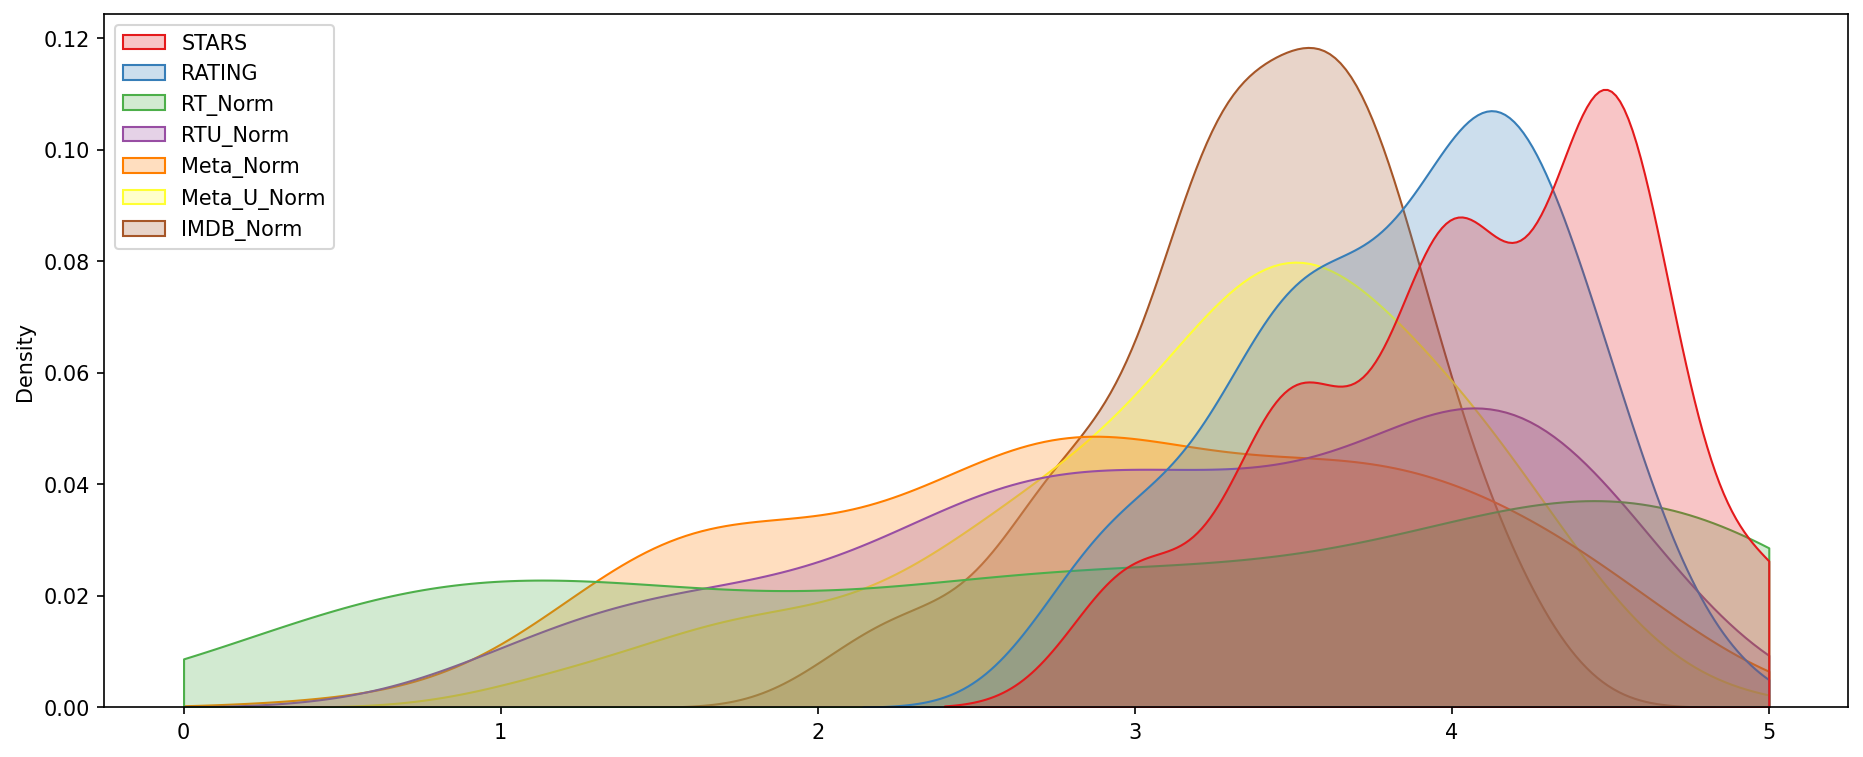

In [141]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution.**
Moreover, notice how Fandago's ratings are shifted towards 3 stars or higher. There are essentially no bad movies.
This gives us strong indications that Fandango, a website which both sells and rates movies has a tendency to rate movies higher, perhaps in order to motivate users to buy the tickets.

# Thank you for reading